In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics


In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
## 加载数字图片数据
digits = datasets.load_digits()

In [4]:
## 获取样本数量，并将图片数据格式化
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [8]:
## 模型构建
classifier = svm.SVC(gamma=0.001)
## 使用二分之一的数据进行模型训练
classifier.fit(data[:int(n_samples / 2)], digits.target[:int(n_samples / 2)])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
## 测试数据部分实际值和预测值获取
expected = digits.target[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])

## 计算准确率
print("分类器%s的分类效果:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("混淆矩阵为:\n%s" % metrics.confusion_matrix(expected, predicted))

分类器SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)的分类效果:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


混淆矩阵为:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


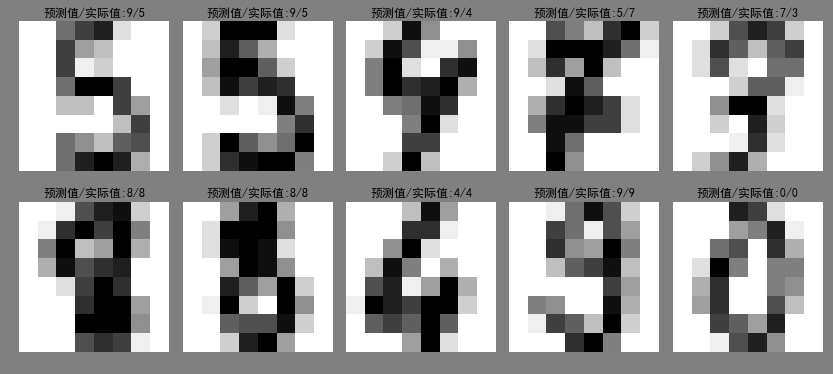

In [7]:
## 进行图片展示
plt.figure(facecolor='gray', figsize=(12,5))
## 先画出5个预测失败的
images_and_predictions = list(zip(digits.images[n_samples / 2:][expected != predicted], expected[expected != predicted], predicted[expected != predicted]))
for index, (image,expection, prediction) in enumerate(images_and_predictions[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'预测值/实际值:%i/%i' % (prediction, expection))
## 再画出5个预测成功的
images_and_predictions = list(zip(digits.images[n_samples / 2:][expected == predicted], expected[expected == predicted], predicted[expected == predicted]))
for index, (image,expection, prediction) in enumerate(images_and_predictions[:5]):
    plt.subplot(2, 5, index + 6)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'预测值/实际值:%i/%i' % (prediction, expection))

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()